In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer 
import re
from datetime import date, datetime, timedelta
from nltk.probability import FreqDist

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df=pd.read_csv('full_dataset.csv')
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,index,title,media,date,datetime,desc,link,img
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Seattle police release video of fatal shooting...,The Seattle Times,01/01/2019,NaN,"Faletogo died of a gunshot wound to the head, ...",https://www.seattletimes.com/seattle-news/crim...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [5]:
#Convert string values in date column to datetime values 
#df['date']=df['date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [6]:
# Drop index and img columns and unneeded columns
df = df.drop(['index', 'img', 'datetime','Unnamed: 0','Unnamed: 0.1',
              'Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1',
              'Unnamed: 0.1.1.1.1.1','Unnamed: 0.1.1.1.1.1.1','index'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57051 entries, 0 to 57050
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   57051 non-null  object        
 1   media   55081 non-null  object        
 2   date    56761 non-null  datetime64[ns]
 3   desc    57051 non-null  object        
 4   link    57051 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.2+ MB


In [8]:
#Fill in Missing values in 'media'
df['media']=df.media.fillna('Others')

In [9]:
#Number of unique news sources
len(df.media.unique())

570

In [10]:
#Top 10 news sources
top_10=df.media.value_counts().head(10)
top_10

The Seattle Times           11294
KIRO-TV                      6641
KING 5                       3002
MyNorthwest.com              2634
Others                       1970
KOMO News                    1706
The Spokesman-Review         1651
KOMO                         1550
KUOW                         1466
CHS Capitol Hill Seattle     1332
Name: media, dtype: int64

In [11]:
#Create Local vs national media dictionary 0-local, 1 = national "Others" =0
media_dict = {
    'The Seattle Times': 0, 
       'West Seattle Blog...':0, 'Others':0 , 'CHS Capitol Hill Seattle':0,
        'Westside Seattle':0, 'PubliCola':0, 'South Seattle Emerald':0,
       'KIRO-TV':0,  'KOMO':0,  'Seattle PI':0,
       'Real Change':0, 'KING 5':0,  'The Stranger':0,
       'Council Connection':0, 'Q13 FOX':0,
       'MyNorthwest.com':0,
       'KOMO News':0,
       'Seattle Met':0,   'Seattle Weekly':0,
    'Northwest Asian Weekly':0,  'West Seattle Blog…': 0,
    'Seattle Spectator': 0, 'Washington Times': 0,   
    'Seattle Magazine |':0, 'Seattle Met':0,
       'Seattle PI':0, 'Seattle Refined':0, 'Seattle Spectator':0,'South Seattle Emerald':0,
       'Seattle Times Interactives Projects':0, 'Seattle Weekly':0,'The Seattle Globalist':0, 'The Seattle Medium':0,
     'West Seattle Blog...':0, 'West Seattle Blog…':0, 'Westside Seattle':0, 'Real Change':0, 
    'International Examiner':0,'dailyuw.com':0


}

In [12]:
for x in df['media']:
    if x not in media_dict:
        media_dict[x]=1
    
df['Local']=[media_dict[x] for x in df['media']]

df.head()

,title,media,date,desc,link,Local
0,Seattle police release video of fatal shooting...,The Seattle Times,2019-01-01,"Faletogo died of a gunshot wound to the head, ...",https://www.seattletimes.com/seattle-news/crim...,0
1,Fatal Seattle police shooting will test new ac...,Crosscut,2019-01-01,Faletogo was stopped by police officers while ...,https://crosscut.com/2019/01/fatal-seattle-pol...,1
2,Seattle Police release body cam footage in fat...,MyNorthwest.com,2019-01-01,The Seattle Police Department released the bod...,https://mynorthwest.com/1232749/seattle-police...,0
3,Former Seattle police chief Jim Pugel will run...,The Seattle Times,2019-01-01,More than two dozen candidates are running acr...,https://www.seattletimes.com/seattle-news/poli...,0
4,Judge dismisses claims against 2 Seattle polic...,The Seattle Times,2019-01-01,"Lyles had a history of contacts with SPD, most...",https://www.seattletimes.com/seattle-news/crim...,0


In [13]:
text =df['link'][0].split('.')[1]
text

'seattletimes'

In [14]:
#Replace 'Others' in media with core website name taken from  link column
df[df['media']=='Others']=df[df['media']=='Others'].apply(lambda x : df['link'][0].split('.')[1]  )

In [15]:
np.sort(df.media.unique())

array(['(Burien) Blog', '10TV', '11Alive.com', '12News.com', '247Sports',
       '6ABC', '89.7 NPR News', '9News', 'ABA Journal', 'ABC 33/40',
       'ABC Chicago', 'ABC News', 'ABC10', 'ABC13', 'ABC4 Utah',
       'ABC7 San Francisco', 'ABS-CBN News', 'AP News', 'Action News Jax',
       'Action News Now', 'Akron Beacon Journal', 'Alaska Public Media',
       'AlterNet', 'American Civil Liberties Union',
       'American Security Today', 'Argus Leader', 'Arizona Daily Star',
       'Army.mil', 'Ars Technica', 'Atlas Obscura', 'Auburn Examiner',
       'Auburn Reporter', 'Austin American-Statesman', 'Axios', 'BBC',
       'Baltimore Sun', 'Bangor Daily News', 'Bay News 9',
       'Bellevue Reporter', 'Bellingham Herald', 'Bemidji Pioneer',
       'Billboard', 'Biometric Update', 'Blabbermouth.net',
       'Black Enterprise', 'Bloomberg Law', 'Bloomberg.com',
       'Boing Boing', 'Boise State Public Radio', 'Boston 25 News',
       'Boston Herald', 'Boston.com', 'Bothell-Kenmore Report

In [16]:
df[df['media']=='Others']

,title,media,date,desc,link,Local


In [17]:
#Checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57051 entries, 0 to 57050
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   57051 non-null  object
 1   media   57051 non-null  object
 2   date    56770 non-null  object
 3   desc    57051 non-null  object
 4   link    57051 non-null  object
 5   Local   57051 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


In [18]:
#Dropping rows with missing date value
df=df.dropna(subset=['date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56770 entries, 0 to 57050
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   56770 non-null  object
 1   media   56770 non-null  object
 2   date    56770 non-null  object
 3   desc    56770 non-null  object
 4   link    56770 non-null  object
 5   Local   56770 non-null  object
dtypes: object(6)
memory usage: 3.0+ MB


In [20]:
df=df[df['Local']==0]
df=df.drop_duplicates(subset=['title','desc','link','media'])
df[df['date']== '2021-02-01 00:00:00'].head(100)

,title,media,date,desc,link,Local


In [21]:
#Save clean, preprocessed dataframe to csv for LDA/Topic Model
df.to_csv('topic_mod_data.csv', index=False)

df.shape

(2891, 6)

In [22]:
media=df['media'][df['Local']==0].unique()
media

array(['The Seattle Times', 'MyNorthwest.com', 'KING 5', 'KIRO-TV',
       'Q13 FOX', 'Seattle Weekly', 'CHS Capitol Hill Seattle',
       'West Seattle Blog...', 'Seattle PI', 'Northwest Asian Weekly',
       'Real Change', 'KOMO', 'The Stranger', 'KOMO News',
       'Westside Seattle', 'West Seattle Blog…', 'International Examiner',
       'Seattle Spectator', 'Washington Times', 'South Seattle Emerald',
       'Seattle Times Interactives Projects', 'The Seattle Globalist',
       'dailyuw.com', 'Seattle Magazine |', 'Seattle Refined',
       'PubliCola', 'Seattle Met', 'The Seattle Medium'], dtype=object)

In [23]:
#All Media Sources
np.sort(df.media.unique())

array(['CHS Capitol Hill Seattle', 'International Examiner', 'KING 5',
       'KIRO-TV', 'KOMO', 'KOMO News', 'MyNorthwest.com',
       'Northwest Asian Weekly', 'PubliCola', 'Q13 FOX', 'Real Change',
       'Seattle Magazine |', 'Seattle Met', 'Seattle PI',
       'Seattle Refined', 'Seattle Spectator',
       'Seattle Times Interactives Projects', 'Seattle Weekly',
       'South Seattle Emerald', 'The Seattle Globalist',
       'The Seattle Medium', 'The Seattle Times', 'The Stranger',
       'Washington Times', 'West Seattle Blog...', 'West Seattle Blog…',
       'Westside Seattle', 'dailyuw.com'], dtype=object)

In [24]:
#All DAte
date_list =list(df.date.unique())
date_list

[Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-

In [25]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Tokenize and Normalize (standardize) the text by removing all punctuation 
#from 'title' and 'desc' making all text lower case

df.title = df.title.apply(lambda x: nltk.RegexpTokenizer(r"\w+").tokenize(x.lower()))
df.desc = df.desc.apply(lambda x: nltk.RegexpTokenizer(r"\w+").tokenize(x.lower()))

In [26]:
#extend list of stopwords to include search terms
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['seattle','police','officer','officers', 'shooting', 'killed', 'spd', 'department', 'said', 'say','call',
               'city','according', 'man', 'woman', 'girl','boy','year', 'old', 'new', 'one', 'two','tip', 'line', '206', 'asking',
                'contact', '5000', '233']
#'dependable','professional','respectful','delivering','quality','enforces','prevents']
stopwords.extend(newStopWords)

In [27]:
#Remove Stop words from the text and lemmetize/text stemming
#ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

'''df.title = df.title.apply(lambda x: [ps.stem(word) for word in x if word not in stopwords])
df.desc = df.desc.apply(lambda x: [ps.stem(word) for word in x if word not in stopwords])'''

df.title = df.title.apply(lambda x: [lemmatizer.lemmatize(word) for word in x if word not in stopwords])
df.desc = df.desc.apply(lambda x: [lemmatizer.lemmatize(word) for word in x if word not in stopwords])

In [28]:
#create trigram from tokenized list
from nltk.util import ngrams
def ngramconvert(df,n=3):
    for item in df[['title', 'desc']].columns:
        df['newtri'+item]=df[item].apply(lambda token_list: list(ngrams(token_list, n)))
    return df

In [29]:
ngramconvert(df,n=3)

,title,media,date,desc,link,Local,newtrititle,newtridesc
0,"[release, video, fatal, eve]",The Seattle Times,2019-01-01 00:00:00,"[faletogo, died, gunshot, wound, head, medical...",https://www.seattletimes.com/seattle-news/crim...,0,"[(release, video, fatal), (video, fatal, eve)]","[(faletogo, died, gunshot), (died, gunshot, wo..."
2,"[release, body, cam, footage, fatal, aurora, a...",MyNorthwest.com,2019-01-01 00:00:00,"[released, body, cam, footage, involving, car,...",https://mynorthwest.com/1232749/seattle-police...,0,"[(release, body, cam), (body, cam, footage), (...","[(released, body, cam), (body, cam, footage), ..."
3,"[former, chief, jim, pugel, run, council]",The Seattle Times,2019-01-01 00:00:00,"[dozen, candidate, running, across, seven, dis...",https://www.seattletimes.com/seattle-news/poli...,0,"[(former, chief, jim), (chief, jim, pugel), (j...","[(dozen, candidate, running), (candidate, runn..."
4,"[judge, dismisses, claim, 2, fatal, charleena,...",The Seattle Times,2019-01-01 00:00:00,"[lyles, history, contact, call, report, domest...",https://www.seattletimes.com/seattle-news/crim...,0,"[(judge, dismisses, claim), (dismisses, claim,...","[(lyles, history, contact), (history, contact,..."
5,"[dna, create, video, get, killer, come, forward]",The Seattle Times,2019-01-01 00:00:00,"[dna, best, interest, u, immediately, nollette...",https://www.seattletimes.com/seattle-news/crim...,0,"[(dna, create, video), (create, video, get), (...","[(dna, best, interest), (best, interest, u), (..."
...,...,...,...,...,...,...,...,...
57041,"[former, player, unlikely, participate, blackh...",The Seattle Times,2021-07-01 00:00:00,"[asked, team, report, allegation, chicago, mia...",https://www.seattletimes.com/sports/hockey/for...,0,"[(former, player, unlikely), (player, unlikely...","[(asked, team, report), (team, report, allegat..."
57045,"[1, dead, 1, injured, federal, way]",The Seattle Times,2021-07-01 00:00:00,"[men, appear, known, dispute, shot, federal, w...",https://www.seattletimes.com/seattle-news/crim...,0,"[(1, dead, 1), (dead, 1, injured), (1, injured...","[(men, appear, known), (appear, known, dispute..."
57047,"[detective, search, salem, ore, homicide, susp...",KIRO-TV,2021-07-01 00:00:00,"[anyone, see, soto, local, salem, tip, 503, 58...",https://www.kiro7.com/news/local/detectives-se...,0,"[(detective, search, salem), (search, salem, o...","[(anyone, see, soto), (see, soto, local), (sot..."
57049,"[investigate, death, female, inmate, lynnwood,...",The Seattle Times,2021-07-01 00:00:00,"[lynnwood, inmate, present, died, kirkland, co...",https://www.seattletimes.com/seattle-news/poli...,0,"[(investigate, death, female), (death, female,...","[(lynnwood, inmate, present), (inmate, present..."


In [30]:
 for date_ in df.date.unique():
    print(str(date_).split(' ')[0], 'Number of articles: ',df['title'][df['date']== date_].count())

2019-01-01 Number of articles:  79
2019-02-01 Number of articles:  23
2019-03-01 Number of articles:  84
2019-04-01 Number of articles:  75
2019-05-01 Number of articles:  88
2019-06-01 Number of articles:  85
2019-07-01 Number of articles:  97
2019-08-01 Number of articles:  47
2019-09-01 Number of articles:  94
2019-10-01 Number of articles:  78
2019-11-01 Number of articles:  81
2019-12-01 Number of articles:  86
2020-01-01 Number of articles:  90
2020-02-01 Number of articles:  105
2020-03-01 Number of articles:  87
2020-04-01 Number of articles:  99
2020-05-01 Number of articles:  93
2020-06-01 Number of articles:  92
2020-07-01 Number of articles:  120
2020-08-01 Number of articles:  118
2020-09-01 Number of articles:  95
2020-10-01 Number of articles:  100
2020-11-01 Number of articles:  103
2020-12-01 Number of articles:  100
2021-01-01 Number of articles:  96
2021-02-01 Number of articles:  125
2021-03-01 Number of articles:  112
2021-04-01 Number of articles:  110
2021-05-01 

In [31]:
headline_word_freq={}
summary_word_freq={}

#Measure of the frequency of words in the 'title' column
for date_ in df.date.unique():
    #Initialize FreqDist objects
    fdist_title = FreqDist()
    fdist_desc = FreqDist()

    for hlists_ in df['title'][df['date']== date_]:
        for words in hlists_:
            fdist_title[words]+=1
    
    for slists_ in df['desc'][df['date']== date_]:
        for words in slists_:
            fdist_desc[words]+=1
    
    headline_word_freq[str(date_).split(' ')[0]]=pd.Series(fdist_title, name='freq_title').sort_values(ascending=False)
    summary_word_freq[str(date_).split(' ')[0]]=pd.Series(fdist_desc, name='freq_desc').sort_values(ascending=False)


In [32]:
summary_word_freq_table = pd.DataFrame.from_dict(summary_word_freq)
summary_word_freq_table = summary_word_freq_table.fillna(int(0))

headline_word_freq_table = pd.DataFrame.from_dict(headline_word_freq)
headline_word_freq_table = headline_word_freq_table.fillna(int(0))

In [33]:
summary_word_freq_table.columns

Index(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
       '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
       '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
       '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
       '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
       '2021-07-01'],
      dtype='object')

## Get Top Words by Frequency by Month and By Quarter

In [34]:
date_dict = {'Q1': ['2019-01-01', '2019-02-01', '2019-03-01'],
             'Q2':['2019-04-01', '2019-05-01', '2019-06-01'],
             'Q3':['2019-07-01', '2019-08-01', '2019-09-01'],
             'Q4':['2019-10-01','2019-11-01', '2019-12-01'],
             'Q5':['2020-01-01', '2020-02-01', '2020-03-01'],
             'Q6':['2020-04-01', '2020-05-01', '2020-06-01'],
             'Q7':['2020-07-01', '2020-08-01','2020-09-01'],
             'Q8':['2020-10-01', '2020-11-01', '2020-12-01'],
             'Q9':['2021-01-01','2021-02-01', '2021-03-01'],
             'Q10':['2021-04-01', '2021-05-01', '2021-06-01'],
             'Q11': ['2021-07-01']}

In [35]:
for key_ in date_dict:
    summary_word_freq_table[key_]=summary_word_freq_table[date_dict[key_]].sum(axis=1)

summary_word_freq_table.to_csv('desc_word_freq_table.csv')
summary_word_freq_table

,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,...,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
000,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,...,2.0,3.0,3.0,4.0,8.0,2.0,1.0,3.0,4.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zinn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoe,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zone,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4.0,1.0,2.0,0.0,1.0,1.0
zoomed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
for key_ in date_dict:
    headline_word_freq_table[key_]=headline_word_freq_table[date_dict[key_]].sum(axis=1)

headline_word_freq_table.to_csv('title_word_freq_table.csv')
headline_word_freq_table

,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,...,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
000,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,...,0.0,2.0,3.0,3.0,3.0,3.0,1.0,9.0,3.0,1.0
1,0.0,0.0,0.0,1.0,1.0,3.0,4.0,0.0,1.0,5.0,...,5.0,5.0,5.0,7.0,8.0,2.0,4.0,3.0,10.0,5.0
10,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,4.0,1.0,3.0,4.0,0.0,1.0,1.0,0.0
100,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,...,0.0,2.0,2.0,2.0,0.0,4.0,1.0,1.0,1.0,1.0
100m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
zip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
zippy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0


In [37]:
def top_summary_words_qtr(quarter):
    return summary_word_freq_table[quarter].sort_values(ascending=False).head(10)


def top_summary_words_month(month):
    return summary_word_freq_table[month].sort_values(ascending=False).head(10)

In [38]:
#summary_word_freq_table['Q3']
top_summary_words_qtr('Q2'), top_summary_words_month('2019-09-01')

(people           16.0
 county           15.0
 crime            15.0
 may              14.0
 arrested         13.0
 investigation    13.0
 fire             12.0
 news             12.0
 detective        12.0
 asked            11.0
 Name: Q2, dtype: float64,
 crime      10.0
 west        7.0
 drug        7.0
 suspect     7.0
 video       7.0
 people      6.0
 time        6.0
 around      6.0
 anyone      6.0
 monday      6.0
 Name: 2019-09-01, dtype: float64)

In [42]:
#Trigram for news headlines
trigram_list =[]

for trigrams_ in df['newtrititle']:
    trigram_list.append(trigrams_)
trigram_headlines =pd.DataFrame(trigram_list)

In [43]:
trigram_headlines =trigram_headlines.stack()

In [44]:
trigram_headlines =pd.DataFrame(trigram_headlines)
trigram_headlines.columns = ['trigram_headlines']
trigram_headlines=trigram_headlines.reset_index().drop(['level_0', 'level_1'], axis=1)
trigram_headlines= trigram_headlines[trigram_headlines['trigram_headlines']!='None']

In [45]:
trigram_headlines.value_counts().head(10)

trigram_headlines          
(mayor, jenny, durkan)         20
(west, crime, watch)           14
(cal, anderson, park)          14
(black, life, matter)          12
(washington, state, nation)    11
(chief, carmen, best)          10
(daily, news, update)          10
(19, area, washington)         10
(know, today, covid)           10
(area, washington, state)      10
dtype: int64

In [46]:
#Trigram for news article summaries
trigram_sumlist =[]

for trigrams_ in df['newtridesc']:
    trigram_sumlist.append(trigrams_)
trigram_summaries =pd.DataFrame(trigram_sumlist)

In [47]:
trigram_summaries =trigram_summaries.stack()

In [48]:
trigram_summaries =pd.DataFrame(trigram_summaries)
trigram_summaries.columns = ['trigram_news_summaries']
trigram_summaries=trigram_summaries.reset_index().drop(['level_0', 'level_1'], axis=1)
trigram_summaries= trigram_summaries[trigram_summaries['trigram_news_summaries']!='None']

In [49]:
trigram_summaries.value_counts().head(10)

trigram_news_summaries       
(mayor, jenny, durkan)           50
(chief, carmen, best)            35
(chief, adrian, diaz)            29
(county, sheriff, office)        23
(interim, chief, adrian)         20
(black, life, matter)            19
(king, county, sheriff)          17
(harborview, medical, center)    14
(photo, courtesy, layoff)        12
(courtesy, layoff, todd)         11
dtype: int64

An initial analysis of the trigram_summaries results (shown above) and the word frequency distribution table for the news sumarries indicates that there is a set a text that appears repeatedly for 2,254 times and it contains text. 

Upon further investigation, we were able to identify the source text on the Seattle Police Department's website:

"The Seattle Police Department (SPD) prevents crime, enforces laws, and supports quality public safety by delivering respectful, professional, and dependable police services. SPD operates within a framework that divides the city into five geographical areas called "precincts". These precincts define east, west, north, south, and southwest patrol areas, with a police station in each."

This means that 2,254 articles in the dataset are coming from SPD or from a https://www.seattle.gov/police site which have the above text at the bottom of those pages.)



In [50]:
#Save clean, preprocessed dataframe to csv
df.to_csv('news_clean_tokens.csv', index=False)

In [51]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [53]:

from wordcloud import WordCloud

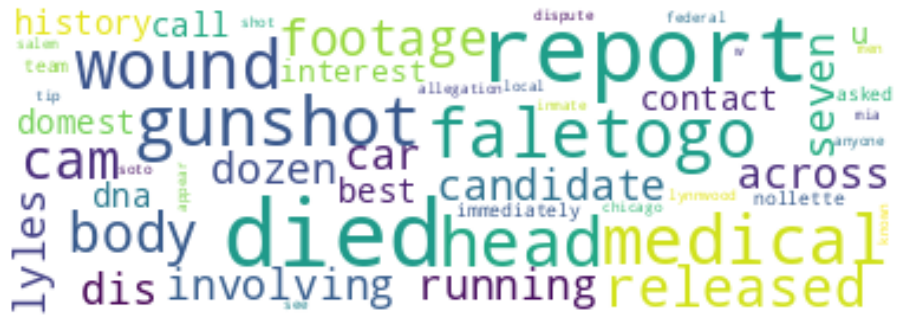

In [54]:
import numpy as np
from PIL import Image

# Create and generate a word cloud image:
spd_mask = np.array(Image.open('spd.png'))
wc = WordCloud(background_color='white',mask=spd_mask, max_words=50)

# for News summaries
wc.generate(str(df.desc))


# Display the generated image:
plt.figure(figsize = (16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

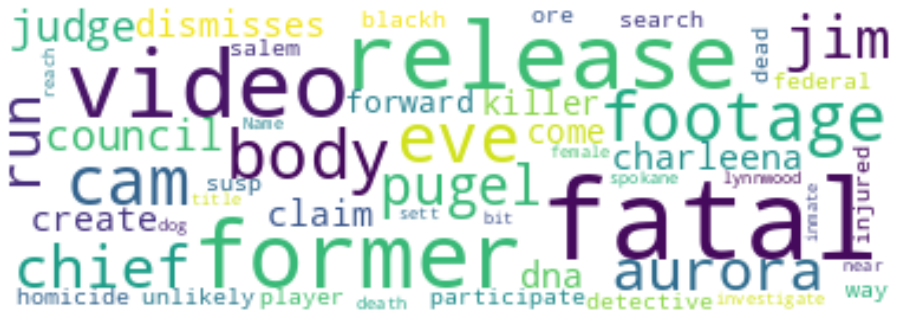

In [55]:
#For News Headlines
wc.generate(str(df.title))


# Display the generated image:
plt.figure(figsize = (16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Topic Modeling 

In [56]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [57]:
#for LDA
import pyLDAvis


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/conda/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [58]:
df_topic =df[['title', 'media', 'desc']]
df_topic.head()

,title,media,desc
0,"[release, video, fatal, eve]",The Seattle Times,"[faletogo, died, gunshot, wound, head, medical..."
2,"[release, body, cam, footage, fatal, aurora, a...",MyNorthwest.com,"[released, body, cam, footage, involving, car,..."
3,"[former, chief, jim, pugel, run, council]",The Seattle Times,"[dozen, candidate, running, across, seven, dis..."
4,"[judge, dismisses, claim, 2, fatal, charleena,...",The Seattle Times,"[lyles, history, contact, call, report, domest..."
5,"[dna, create, video, get, killer, come, forward]",The Seattle Times,"[dna, best, interest, u, immediately, nollette..."


In [59]:
# Create Dictionary
headline_dictionary = corpora.Dictionary(df_topic.title)

# Create Corpus
headline_texts = df_topic['title']

# Term Document Frequency
corpus = [headline_dictionary.doc2bow(text) for text in headline_texts]


In [60]:
# Create Dictionary
summary_dictionary = corpora.Dictionary(df_topic.title)

# Create Corpus
summary_texts = df_topic['desc']

# Term Document Frequency
corpus_sum = [summary_dictionary.doc2bow(text) for text in summary_texts]


In [61]:
# number of topics
num_topics = 5

# Build LDA model for headlines
lda_model_headline = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=headline_dictionary,
                                       num_topics=num_topics,
                                       random_state =42)

In [62]:
# number of topics
num_topics = 5

# Build LDA model for summaries
lda_model_summary = gensim.models.LdaMulticore(corpus=corpus_sum,
                                       id2word=summary_dictionary,
                                       num_topics=num_topics,
                                       random_state =42)

In [63]:
from pprint import pprint

In [64]:
pprint(lda_model_headline.print_topics())
doc_lda_headline = lda_model_headline[corpus]

[(0,
  '0.010*"suspect" + 0.005*"arrest" + 0.005*"arrested" + 0.005*"accused" + '
  '0.005*"council" + 0.005*"19" + 0.005*"case" + 0.004*"gun" + 0.004*"protest" '
  '+ 0.004*"county"'),
 (1,
  '0.006*"mayor" + 0.006*"county" + 0.006*"council" + 0.005*"chief" + '
  '0.005*"say" + 0.005*"home" + 0.005*"durkan" + 0.004*"king" + '
  '0.004*"community" + 0.004*"near"'),
 (2,
  '0.009*"west" + 0.008*"protest" + 0.007*"shot" + 0.007*"suspect" + '
  '0.007*"chief" + 0.006*"2" + 0.006*"arrest" + 0.006*"capitol" + '
  '0.006*"arrested" + 0.005*"county"'),
 (3,
  '0.008*"arrested" + 0.008*"death" + 0.007*"council" + 0.006*"protest" + '
  '0.005*"tacoma" + 0.005*"mayor" + 0.005*"cop" + 0.005*"say" + 0.004*"arrest" '
  '+ 0.004*"found"'),
 (4,
  '0.010*"suspect" + 0.007*"washington" + 0.007*"arrested" + 0.006*"murder" + '
  '0.006*"shot" + 0.005*"chief" + 0.005*"arrest" + 0.005*"fire" + '
  '0.005*"missing" + 0.005*"case"')]


In [65]:
pprint(lda_model_summary.print_topics())
doc_lda_summary = lda_model_summary[corpus_sum]

[(0,
  '0.006*"council" + 0.006*"federal" + 0.005*"county" + 0.005*"crime" + '
  '0.005*"sunday" + 0.005*"investigation" + 0.004*"people" + 0.004*"arrested" '
  '+ 0.004*"shot" + 0.004*"state"'),
 (1,
  '0.008*"county" + 0.007*"council" + 0.007*"crime" + 0.005*"mayor" + '
  '0.005*"durkan" + 0.005*"also" + 0.005*"would" + 0.005*"people" + '
  '0.005*"king" + 0.005*"office"'),
 (2,
  '0.010*"chief" + 0.009*"report" + 0.006*"around" + 0.006*"investigation" + '
  '0.006*"county" + 0.006*"shot" + 0.005*"last" + 0.005*"suspect" + '
  '0.004*"investigating" + 0.004*"protest"'),
 (3,
  '0.009*"arrested" + 0.009*"people" + 0.006*"tacoma" + 0.006*"mayor" + '
  '0.006*"detective" + 0.005*"court" + 0.005*"time" + 0.005*"chief" + '
  '0.005*"durkan" + 0.005*"precinct"'),
 (4,
  '0.008*"chief" + 0.006*"friday" + 0.006*"investigation" + 0.006*"fire" + '
  '0.005*"report" + 0.005*"9" + 0.005*"suspect" + 0.005*"incident" + '
  '0.005*"way" + 0.005*"council"')]


In [66]:
from gensim.models import Word2Vec

In [67]:
cluster_model = Word2Vec(df['desc'], min_count=1)

In [76]:
cluster_model.wv.most_similar('immigration', topn=10) # - The word 'immigrant' is not present in the text

[('phoenix', 0.33756402134895325),
 ('sport', 0.33127954602241516),
 ('brutal', 0.33049362897872925),
 ('old', 0.3266389071941376),
 ('61st', 0.3199332058429718),
 ('robert', 0.3076222836971283),
 ('leaving', 0.2973760664463043),
 ('burrowed', 0.2959795296192169),
 ('schmidt', 0.28761520981788635),
 ('dinner', 0.28760826587677)]

In [68]:
cluster_model.wv.most_similar('asian', topn=10)

[('last', 0.7330746054649353),
 ('family', 0.7329069375991821),
 ('south', 0.732313871383667),
 ('block', 0.7315130233764648),
 ('began', 0.7300443649291992),
 ('march', 0.7300207018852234),
 ('time', 0.7289285659790039),
 ('member', 0.7279661297798157),
 ('including', 0.7266372442245483),
 ('2020', 0.7265897393226624)]

In [69]:
cluster_model.wv.most_similar('white', topn=10) #the word caucasian not present in the dataset

[('fatal', 0.6174631118774414),
 ('work', 0.6074430346488953),
 ('2019', 0.6012510657310486),
 ('civilian', 0.5991460680961609),
 ('bellevue', 0.5968472361564636),
 ('stolen', 0.5955609679222107),
 ('angeles', 0.5951353907585144),
 ('suspect', 0.5941004157066345),
 ('west', 0.5940797924995422),
 ('early', 0.5940510034561157)]

In [70]:
cluster_model.wv.most_similar('african', topn=10)

[('autumn', 0.46961385011672974),
 ('impaired', 0.43849942088127136),
 ('levy', 0.4348020851612091),
 ('huge', 0.3915736675262451),
 ('talley', 0.370450496673584),
 ('sale', 0.36855846643447876),
 ('initially', 0.3619425892829895),
 ('linx', 0.35377180576324463),
 ('perimeter', 0.35166487097740173),
 ('problem', 0.3452814519405365)]

In [71]:
cluster_model.wv.most_similar('black', topn=10)

[('last', 0.9709916710853577),
 ('crime', 0.9705468416213989),
 ('tuesday', 0.9702731370925903),
 ('report', 0.9697124361991882),
 ('suspect', 0.9696007966995239),
 ('tacoma', 0.968795120716095),
 ('chief', 0.9682679772377014),
 ('around', 0.9682375192642212),
 ('time', 0.9681787490844727),
 ('shot', 0.9680846333503723)]

In [74]:
cluster_model.wv.most_similar('mexican', topn=10) # the terms hispanic and latino are not in the dataset

[('watch', 0.38077035546302795),
 ('grand', 0.35036057233810425),
 ('obstruction', 0.3414399027824402),
 ('seahawks', 0.34142109751701355),
 ('neither', 0.33246493339538574),
 ('affiliation', 0.3315459191799164),
 ('citizenship', 0.32106319069862366),
 ('hollingsworth', 0.318460077047348),
 ('spoke', 0.3182604908943176),
 ('slidell', 0.3169904053211212)]